In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pickle
import calendar

In [3]:
data = pd.read_excel('../data/precios_mexico_test.xlsx', index_col="FECHA_HORA", names=['P'])
data.head()

P
FECHA_HORA                 
2018-01-11 00:00:00  38.878
2018-01-11 01:00:00  33.544
2018-01-11 02:00:00  32.477
2018-01-11 03:00:00  32.498
2018-01-11 04:00:00  32.659

In [12]:
def procesing(df):
    ''' Adds lags  and day_of_week and month columns to dataframe'''
    
    # Add Lags
    df_shifted = pd.concat([df]+[df['P'].shift(i) for i in range(24,73)]+[df['P'].shift(i) for i in range(168,193)], axis=1)
    df_shifted.columns = ['P']+['Ph-{}'.format(i) for i in range(24,73)] + ['Ph-{}'.format(i) for i in range(168,193)]
    
    # Add day_of_week column
    df_shifted['day_of_week'] = pd.to_datetime(df_shifted.index)
    df_shifted['day_of_week'] = df_shifted.day_of_week.dt.day_name()
    
    # Add month abbreviature column
    df_shifted['month'] = pd.to_datetime(df_shifted.index).month_name()
    
    # Add one-hot Encoding
    df = pd.get_dummies(df_shifted)
    
    return df.dropna()

In [5]:
data.tail(24)

P
FECHA_HORA                  
2019-01-11 00:00:00   64.452
2019-01-11 01:00:00   56.638
2019-01-11 02:00:00   48.571
2019-01-11 03:00:00   47.260
2019-01-11 04:00:00   46.103
2019-01-11 05:00:00   55.939
2019-01-11 06:00:00   67.026
2019-01-11 07:00:00   76.771
2019-01-11 08:00:00   83.542
2019-01-11 09:00:00   89.540
2019-01-11 10:00:00   86.793
2019-01-11 11:00:00   90.080
2019-01-11 12:00:00   88.869
2019-01-11 13:00:00   90.831
2019-01-11 14:00:00   90.831
2019-01-11 15:00:00   86.253
2019-01-11 16:00:00   86.388
2019-01-11 17:00:00   90.831
2019-01-11 18:00:00  101.183
2019-01-11 19:00:00  102.504
2019-01-11 20:00:00   98.774
2019-01-11 21:00:00   87.426
2019-01-11 22:00:00   85.978
2019-01-11 23:00:00   85.158

In [6]:
import datetime

In [7]:
base = datetime.datetime(2019, 1, 12)
date_arr = np.array([base + datetime.timedelta(hours=i) for i in range(24)])

In [8]:
df = pd.DataFrame(np.zeros(24), date_arr, columns=['P'])

In [9]:
df.index.name = "FECHA_HORA"
df

P
FECHA_HORA              
2019-01-12 00:00:00  0.0
2019-01-12 01:00:00  0.0
2019-01-12 02:00:00  0.0
2019-01-12 03:00:00  0.0
2019-01-12 04:00:00  0.0
2019-01-12 05:00:00  0.0
2019-01-12 06:00:00  0.0
2019-01-12 07:00:00  0.0
2019-01-12 08:00:00  0.0
2019-01-12 09:00:00  0.0
2019-01-12 10:00:00  0.0
2019-01-12 11:00:00  0.0
2019-01-12 12:00:00  0.0
2019-01-12 13:00:00  0.0
2019-01-12 14:00:00  0.0
2019-01-12 15:00:00  0.0
2019-01-12 16:00:00  0.0
2019-01-12 17:00:00  0.0
2019-01-12 18:00:00  0.0
2019-01-12 19:00:00  0.0
2019-01-12 20:00:00  0.0
2019-01-12 21:00:00  0.0
2019-01-12 22:00:00  0.0
2019-01-12 23:00:00  0.0

In [10]:
data_a = data.append(df)
data_a.tail(48)

P
FECHA_HORA                  
2019-01-11 00:00:00   64.452
2019-01-11 01:00:00   56.638
2019-01-11 02:00:00   48.571
2019-01-11 03:00:00   47.260
2019-01-11 04:00:00   46.103
2019-01-11 05:00:00   55.939
2019-01-11 06:00:00   67.026
2019-01-11 07:00:00   76.771
2019-01-11 08:00:00   83.542
2019-01-11 09:00:00   89.540
2019-01-11 10:00:00   86.793
2019-01-11 11:00:00   90.080
2019-01-11 12:00:00   88.869
2019-01-11 13:00:00   90.831
2019-01-11 14:00:00   90.831
2019-01-11 15:00:00   86.253
2019-01-11 16:00:00   86.388
2019-01-11 17:00:00   90.831
2019-01-11 18:00:00  101.183
2019-01-11 19:00:00  102.504
2019-01-11 20:00:00   98.774
2019-01-11 21:00:00   87.426
2019-01-11 22:00:00   85.978
2019-01-11 23:00:00   85.158
2019-01-12 00:00:00    0.000
2019-01-12 01:00:00    0.000
2019-01-12 02:00:00    0.000
2019-01-12 03:00:00    0.000
2019-01-12 04:00:00    0.000
2019-01-12 05:00:00    0.000
2019-01-12 06:00:00    0.000
2019-01-12 07:00:00    0.000
2019-01-12 08:00:00    0.000
2019-01-12 09:00:00    0.000
2019-01-12 10:00:00    0.000
2019-01-12 11:00:00    0.000
2019-01-12 12:00:00    0.000
2019-01-12 13:00:00    0.000
2019-01-12 14:00:00    0.000
2019-01-12 15:00:00    0.000
2019-01-12 16:00:00    0.000
2019-01-12 17:00:00    0.000
2019-01-12 18:00:00    0.000
2019-01-12 19:00:00    0.000
2019-01-12 20:00:00    0.000
2019-01-12 21:00:00    0.000
2019-01-12 22:00:00    0.000
2019-01-12 23:00:00    0.000

In [13]:
data = procesing(data_a)
data.tail(24)

P    Ph-24    Ph-25    Ph-26    Ph-27    Ph-28  \
FECHA_HORA                                                              
2019-01-12 00:00:00  0.0   64.452   65.682   67.307   68.010   71.212   
2019-01-12 01:00:00  0.0   56.638   64.452   65.682   67.307   68.010   
2019-01-12 02:00:00  0.0   48.571   56.638   64.452   65.682   67.307   
2019-01-12 03:00:00  0.0   47.260   48.571   56.638   64.452   65.682   
2019-01-12 04:00:00  0.0   46.103   47.260   48.571   56.638   64.452   
2019-01-12 05:00:00  0.0   55.939   46.103   47.260   48.571   56.638   
2019-01-12 06:00:00  0.0   67.026   55.939   46.103   47.260   48.571   
2019-01-12 07:00:00  0.0   76.771   67.026   55.939   46.103   47.260   
2019-01-12 08:00:00  0.0   83.542   76.771   67.026   55.939   46.103   
2019-01-12 09:00:00  0.0   89.540   83.542   76.771   67.026   55.939   
2019-01-12 10:00:00  0.0   86.793   89.540   83.542   76.771   67.026   
2019-01-12 11:00:00  0.0   90.080   86.793   89.540   83.542   76.771   
2019-01-12 12:00:00  0.0   88.869   90.080   86.793   89.540   83.542   
2019-01-12 13:00:00  0.0   90.831   88.869   90.080   86.793   89.540   
2019-01-12 14:00:00  0.0   90.831   90.831   88.869   90.080   86.793   
2019-01-12 15:00:00  0.0   86.253   90.831   90.831   88.869   90.080   
2019-01-12 16:00:00  0.0   86.388   86.253   90.831   90.831   88.869   
2019-01-12 17:00:00  0.0   90.831   86.388   86.253   90.831   90.831   
2019-01-12 18:00:00  0.0  101.183   90.831   86.388   86.253   90.831   
2019-01-12 19:00:00  0.0  102.504  101.183   90.831   86.388   86.253   
2019-01-12 20:00:00  0.0   98.774  102.504  101.183   90.831   86.388   
2019-01-12 21:00:00  0.0   87.426   98.774  102.504  101.183   90.831   
2019-01-12 22:00:00  0.0   85.978   87.426   98.774  102.504  101.183   
2019-01-12 23:00:00  0.0   85.158   85.978   87.426   98.774  102.504   

                       Ph-29   Ph-30   Ph-31   Ph-32       ...         \
FECHA_HORA                                                 ...          
2019-01-12 00:00:00   72.734  70.207  67.977  65.774       ...          
2019-01-12 01:00:00   71.212  72.734  70.207  67.977       ...          
2019-01-12 02:00:00   68.010  71.212  72.734  70.207       ...          
2019-01-12 03:00:00   67.307  68.010  71.212  72.734       ...          
2019-01-12 04:00:00   65.682  67.307  68.010  71.212       ...          
2019-01-12 05:00:00   64.452  65.682  67.307  68.010       ...          
2019-01-12 06:00:00   56.638  64.452  65.682  67.307       ...          
2019-01-12 07:00:00   48.571  56.638  64.452  65.682       ...          
2019-01-12 08:00:00   47.260  48.571  56.638  64.452       ...          
2019-01-12 09:00:00   46.103  47.260  48.571  56.638       ...          
2019-01-12 10:00:00   55.939  46.103  47.260  48.571       ...          
2019-01-12 11:00:00   67.026  55.939  46.103  47.260       ...          
2019-01-12 12:00:00   76.771  67.026  55.939  46.103       ...          
2019-01-12 13:00:00   83.542  76.771  67.026  55.939       ...          
2019-01-12 14:00:00   89.540  83.542  76.771  67.026       ...          
2019-01-12 15:00:00   86.793  89.540  83.542  76.771       ...          
2019-01-12 16:00:00   90.080  86.793  89.540  83.542       ...          
2019-01-12 17:00:00   88.869  90.080  86.793  89.540       ...          
2019-01-12 18:00:00   90.831  88.869  90.080  86.793       ...          
2019-01-12 19:00:00   90.831  90.831  88.869  90.080       ...          
2019-01-12 20:00:00   86.253  90.831  90.831  88.869       ...          
2019-01-12 21:00:00   86.388  86.253  90.831  90.831       ...          
2019-01-12 22:00:00   90.831  86.388  86.253  90.831       ...          
2019-01-12 23:00:00  101.183  90.831  86.388  86.253       ...          

                     month_December  month_February  month_January  \
FECHA_HORA                                                           
2019-01-12 00:00:00               0               0              1   
2019-01-12 01:0

In [14]:
X = data['2019-01-01':'2019-01-11'].drop('P', axis=1)

In [15]:
X

Ph-24   Ph-25   Ph-26    Ph-27    Ph-28    Ph-29  \
FECHA_HORA                                                               
2019-01-01 00:00:00  58.066  79.038  93.042  100.805  100.873  101.118   
2019-01-01 01:00:00  53.274  58.066  79.038   93.042  100.805  100.873   
2019-01-01 02:00:00  44.020  53.274  58.066   79.038   93.042  100.805   
2019-01-01 03:00:00  41.067  44.020  53.274   58.066   79.038   93.042   
2019-01-01 04:00:00  37.671  41.067  44.020   53.274   58.066   79.038   
2019-01-01 05:00:00  42.330  37.671  41.067   44.020   53.274   58.066   
2019-01-01 06:00:00  48.875  42.330  37.671   41.067   44.020   53.274   
2019-01-01 07:00:00  50.028  48.875  42.330   37.671   41.067   44.020   
2019-01-01 08:00:00  53.247  50.028  48.875   42.330   37.671   41.067   
2019-01-01 09:00:00  63.843  53.247  50.028   48.875   42.330   37.671   
2019-01-01 10:00:00  75.543  63.843  53.247   50.028   48.875   42.330   
2019-01-01 11:00:00  71.173  75.543  63.843   53.247   50.028   48.875   
2019-01-01 12:00:00  74.295  71.173  75.543   63.843   53.247   50.028   
2019-01-01 13:00:00  69.147  74.295  71.173   75.543   63.843   53.247   
2019-01-01 14:00:00  63.363  69.147  74.295   71.173   75.543   63.843   
2019-01-01 15:00:00  63.331  63.363  69.147   74.295   71.173   75.543   
2019-01-01 16:00:00  75.612  63.331  63.363   69.147   74.295   71.173   
2019-01-01 17:00:00  81.829  75.612  63.331   63.363   69.147   74.295   
2019-01-01 18:00:00  74.399  81.829  75.612   63.331   63.363   69.147   
2019-01-01 19:00:00  72.269  74.399  81.829   75.612   63.331   63.363   
2019-01-01 20:00:00  72.582  72.269  74.399   81.829   75.612   63.331   
2019-01-01 21:00:00  71.135  72.582  72.269   74.399   81.829   75.612   
2019-01-01 22:00:00  76.105  71.135  72.582   72.269   74.399   81.829   
2019-01-01 23:00:00  51.813  76.105  71.135   72.582   72.269   74.399   
2019-01-02 00:00:00  39.946  51.813  76.105   71.135   72.582   72.269   
2019-01-02 01:00:00  41.470  39.946  51.813   76.105   71.135   72.582   
2019-01-02 02:00:00  33.572  41.470  39.946   51.813   76.105   71.135   
2019-01-02 03:00:00  32.096  33.572  41.470   39.946   51.813   76.105   
2019-01-02 04:00:00  31.215  32.096  33.572   41.470   39.946   51.813   
2019-01-02 05:00:00  30.419  31.215  32.096   33.572   41.470   39.946   
...                     ...     ...     ...      ...      ...      ...   
2019-01-10 18:00:00  78.212  78.009  76.144   78.241   76.712   75.996   
2019-01-10 19:00:00  79.343  78.212  78.009   76.144   78.241   76.712   
2019-01-10 20:00:00  78.756  79.343  78.212   78.009   76.144   78.241   
2019-01-10 21:00:00  79.886  78.756  79.343   78.212   78.009   76.144   
2019-01-10 22:00:00  74.803  79.886  78.756   79.343   78.212   78.009   
2019-01-10 23:00:00  69.404  74.803  79.886   78.756   79.343   78.212   
2019-01-11 00:00:00  51.736  69.404  74.803   79.886   78.756   79.343   
2019-01-11 01:00:00  43.391  51.736  69.404   74.803   79.886   78.756   
2019-01-11 02:00:00  33.635  43.391  51.736   69.404   74.803   79.886   
2019-01-11 03:00:00  32.823  33.635  43.391   51.736   69.404   74.803   
2019-01-11 04:00:00  32.473  32.823  33.635   43.391   51.736   69.404   
2019-01-11 05:00:00  42.425  32.473  32.823   33.635   43.391   51.736   
2019-01-11 06:00:00  54.037  42.425  32.473   32.823   33.635   43.391   
2019-01-11 07:00:00  62.533  54.037  42.425   32.473   32.823   33.635   
2019-01-11 08:00:00  65.512  62.533  54.037   42.425   32.473   32.823   
2019-01-11 09:00:00  68.069  65.512  62.533   54.037   42.425   32.473   
2019-01-11 10:00:00  71.067  68.069  65.512   62.533   54.037   42.425   
2019-01-11 11:00:00  68.881  71.067  68.069   65.512   62.533   54.037   
2019-01-11 12:00:00  69.273  68.881  71.067   68.069   65.512   62.533   
2019-01-11 13:00:00  71.470  69.273  68.881   71.067   68.069   65.512   
2019-01-11 14:00:00  67.986  71.470  69.273   68.881   71.067   68.069   
2019-01-11 15:00:00  69.53

In [16]:
X.shape

(264, 93)

In [17]:
model = pickle.load(open("../models/lbrprice_model_svr.pkl","rb"))

In [18]:
pred = model.predict(X)

C:\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [19]:
dateRange = pd.date_range('2019-01-01', '2019-01-12', freq='H').to_series()

<IPython.core.display.Javascript object>


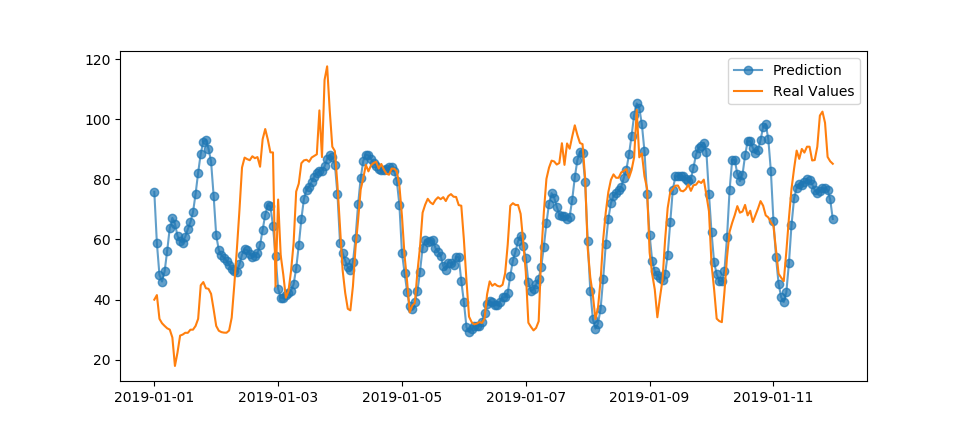

In [24]:
import matplotlib.pyplot as plt
plt.plot(dateRange[:264], pred, '-o', label="Prediction", alpha=0.7)
plt.plot(dateRange[:264], data['2019-01-01':'2019-01-11']['P'].values, label="Real Values")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


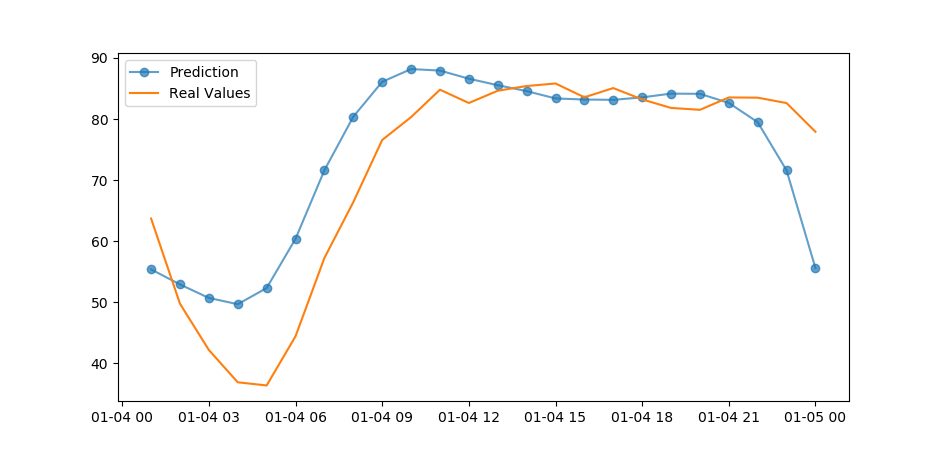

In [26]:
import matplotlib.pyplot as plt
plt.plot(dateRange[73:97], pred[73:97], '-o', label="Prediction", alpha=0.7)
plt.plot(dateRange[73:97], data['2019-01-04']['P'].values, label="Real Values")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


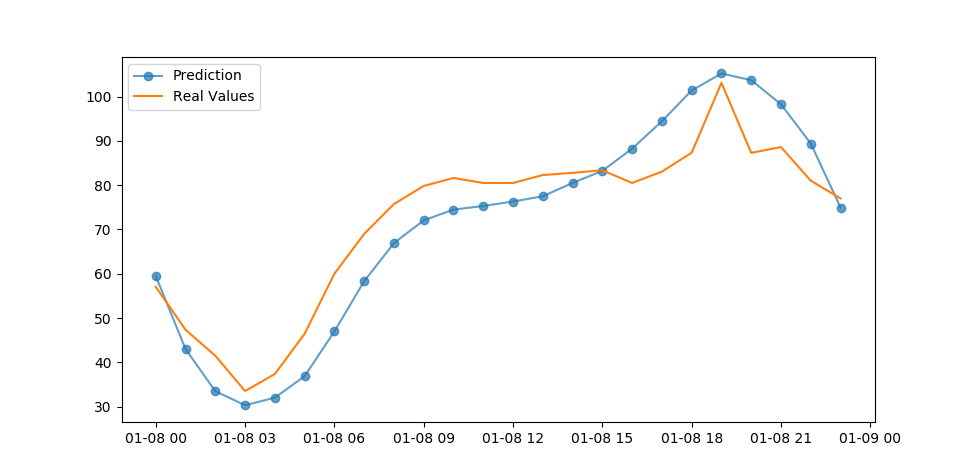

In [29]:
plt.plot(dateRange[168:192], pred[168:192], '-o', label="Prediction", alpha=0.7)
plt.plot(dateRange[168:192], data['2019-01-08']['P'].values, label="Real Values")
plt.legend()
plt.show()

(array([[ 59.50307296],
        [ 42.99208422],
        [ 33.49375066],
        [ 30.30422693],
        [ 32.01312119],
        [ 36.86943494],
        [ 46.9725757 ],
        [ 58.31600509],
        [ 66.90973838],
        [ 72.05765868],
        [ 74.47180939],
        [ 75.30374694],
        [ 76.2971681 ],
        [ 77.49538417],
        [ 80.49780539],
        [ 83.23409955],
        [ 88.24029681],
        [ 94.42987284],
        [101.37421077],
        [105.21522841],
        [103.7053482 ],
        [ 98.25323777],
        [ 89.39565867],
        [ 74.94250863]]), array([[ 57.054],
        [ 47.357],
        [ 41.496],
        [ 33.528],
        [ 37.352],
        [ 46.44 ],
        [ 59.998],
        [ 68.987],
        [ 75.744],
        [ 79.822],
        [ 81.62 ],
        [ 80.495],
        [ 80.495],
        [ 82.283],
        [ 82.781],
        [ 83.367],
        [ 80.495],
        [ 83.056],
        [ 87.329],
        [103.092],
        [ 87.297],
        [ 88.597],
     